<a href="https://colab.research.google.com/github/arre-ankit/AI-Agents-LangGraph/blob/main/AI_Prompt_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Generation from User Requirements

In this example we will create a chat bot that helps a user generate a prompt.
It will first collect requirements from the user, and then will generate the prompt (and refine it based on user input).
These are split into two separate states, and the LLM decides when to transition between them.

A graphical representation of the system can be found below.

![](imgs/prompt-generator.png)

## Gather information

First, let's define the part of the graph that will gather user requirements. This will be an LLM call with a specific system message. It will have access to a tool that it can call when it is ready to generate the prompt.

In [ ]:
! pip install -U langchain_community langchain-openai langchain-anthropic langchain langgraph langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 993.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.5/865.5 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Use the graph

We can now use the created chatbot.

In [ ]:
!pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=7c036699

In [ ]:
import gradio as gr

In [ ]:
import uuid
from typing import List, Literal

import gradio as gr
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage, ToolMessage
from langchain_core.pydantic_v1 import BaseModel
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import START, END, MessageGraph

# Define your template
template = """Your job is to get information from a user about what type of prompt template they want to create.

You should get the following information from them:

- What the objective of the prompt is
- What variables will be passed into the prompt template
- Any constraints for what the output should NOT do
- Any requirements that the output MUST adhere to

If you are not able to discern this info, ask them to clarify! Do not attempt to wildly guess.

After you are able to discern all the information, call the relevant tool."""

# Function to get the system messages and additional user messages
def get_messages_info(messages):
    return [SystemMessage(content=template)] + messages

# Define your PromptInstructions class
class PromptInstructions(BaseModel):
    """Instructions on how to prompt the LLM."""

    objective: str
    variables: List[str]
    constraints: List[str]
    requirements: List[str]

# Initialize your language models
llm = ChatGroq(
    temperature=0,
    groq_api_key="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",
    model_name="mixtral-8x7b-32768"
)
llm_with_tool = llm.bind_tools([PromptInstructions])

# Create the chain for generating prompt instructions
chain = get_messages_info | llm_with_tool

# New system prompt for generating prompt templates
prompt_system = """Based on the following requirements, write a good prompt template:

{reqs}"""

# Function to get messages for prompt generation
def get_prompt_messages(messages: list):
    tool_call = None
    other_msgs = []
    for m in messages:
        if isinstance(m, AIMessage) and m.tool_calls:
            tool_call = m.tool_calls[0]["args"]
        elif isinstance(m, ToolMessage):
            continue
        elif tool_call is not None:
            other_msgs.append(m)
    return [SystemMessage(content=prompt_system.format(reqs=tool_call))] + other_msgs

# Create the chain for prompt generation
prompt_gen_chain = get_prompt_messages | llm

# Function to determine the current state
def get_state(messages) -> Literal["add_tool_message", "info", "__end__"]:
    if isinstance(messages[-1], AIMessage) and messages[-1].tool_calls:
        return "add_tool_message"
    elif not isinstance(messages[-1], HumanMessage):
        return END
    return "info"

# Initialize SQLite memory for saving checkpoints
memory = SqliteSaver.from_conn_string(":memory:")

# Create the message workflow
workflow = MessageGraph()
workflow.add_node("info", chain)
workflow.add_node("prompt", prompt_gen_chain)

# Function to add a tool message
@workflow.add_node
def add_tool_message(state: list):
    return ToolMessage(
        content="Prompt generated!", tool_call_id=state[-1].tool_calls[0]["id"]
    )

# Define conditional transitions in the workflow
workflow.add_conditional_edges("info", get_state)
workflow.add_edge("add_tool_message", "prompt")
workflow.add_edge("prompt", END)
workflow.add_edge(START, "info")

# Compile the graph with the checkpointer
graph = workflow.compile(checkpointer=memory)

# Function to process the user input through the workflow
def process_input(user_input):
    config = {"configurable": {"thread_id": str(uuid.uuid4())}}
    if user_input in {"q", "Q"}:
        return "Byebye"

    # Process the input through the graph
    output = None
    response = []  # Collecting responses to handle streams

    for output in graph.stream(
        [HumanMessage(content=user_input)], config=config, stream_mode="updates"
    ):
        last_message = next(iter(output.values()))

        # Debugging: print the type and content of last_message
        print(f"Debug: Last message type: {type(last_message)}")
        print(f"Debug: Last message content: {last_message}")

        # Assuming last_message has a method to return the text
        # For debugging purposes, let's print the response
        if isinstance(last_message, AIMessage):
            response.append(last_message.content)  # Collect text content

    # Concatenate collected response parts
    response_text = "\n".join(response)

    if response_text:
        return response_text
    elif output and "prompt" in output:
        return "Done!"

    return "No output"

# Define Gradio interface function
def gradio_interface(user_input):
    return process_input(user_input)

# Define and launch the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=2, placeholder="Type your message here..."),
    outputs="text",
    title="AI Prompt Generation",
    description="Enter your requirements and receive a prompt template."
)

# Launch the Gradio app
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ed4cb36c3a3c41d227.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


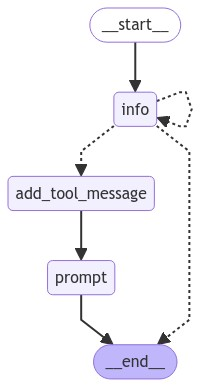

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))